<a href="https://colab.research.google.com/github/Bhavikabanwari/Diabeticsprediction/blob/main/Diabetics_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Diabetes Diagnostics: Exploring Patterns in Patient Health Data**


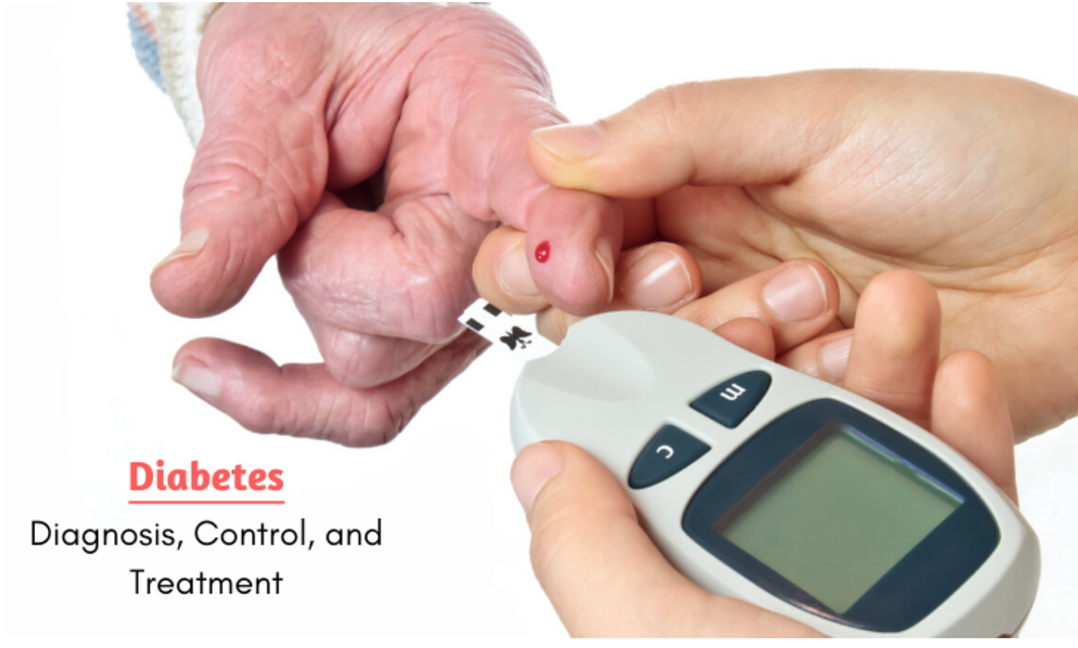

# **Project by: Team 01**
*  Anmol Sharma
*  Bhavika Banwari
* Priyanka Chaudhari
* Prakhar Jain


# **1. Problem Statement**


Despite advancements in medical technology, diabetes remains a significant global health concern. Efficient and accurate diagnostics are crucial for early intervention and effective management of diabetes. In this context, there is a need to explore patterns in patient health data to enhance the understanding of diabetes diagnostics. Current diagnostic methods may have limitations, and leveraging advanced analytics and machine learning techniques can provide valuable insights. The problem is to identify patterns and relationships within patient health data that can contribute to the development of improved and personalized diagnostics for diabetes. This exploration aims to enhance diagnostic accuracy, optimize treatment strategies, and ultimately improve the overall health outcomes for individuals affected by diabetes.

## **2. Executive Summary**

Improving early diabetes detection is the goal of the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) in order to improve patient outcomes. Our business goal is to determine the probability of diabetes based on diagnostic measurements by building prediction models with a carefully selected dataset. Our business objective revolves around employing these models to contribute to proactive and targeted healthcare interventions.



##**3. Importance of the Problem**

Diabetes is a common chronic illness that affects more than 500 million people worldwide, with 38 million cases occurring in the United States. It is typified by high blood sugar levels that can result in serious complications such as kidney failure, heart disease, and blindness. According to data from the World Health Organization, the prevalence of diabetes among persons over the age of 18 increased globally from 4.7% in 1980 to 8.5% in 2014. Diabetes needs to be detected early in order to prevent complications and improve the quality of life for patients, as it was the cause of 1.6 million deaths in 2016. But a lot of people don't know about their illness or can't get the treatment they need. Developing efficient and scalable techniques for diabetes screening and prediction with easily accessible data is essential.

Using machine learning algorithms to evaluate diagnostic measures and categorize people as either non-diabetic or diabetic is one possible option. A key component of artificial intelligence, machine learning enables computers to learn from data, forecast results, and make judgments without the need for explicit programming. It is a promising tool for proactive diabetes care because of its capacity to process large datasets, reveal hidden patterns, and adjust to changing surroundings.

## **4. Importing Libraries**

In [ ]:
pip install seaborn matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


## **5. Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = '/content/health care diabetes.csv'
diabetics = pd.read_csv(url)

## **6. Understanding the Diabetics dataset**

In [ ]:
diabetics.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
diabetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Exploring the dataset with different features**

Text(0, 0.5, 'Pregnancies')

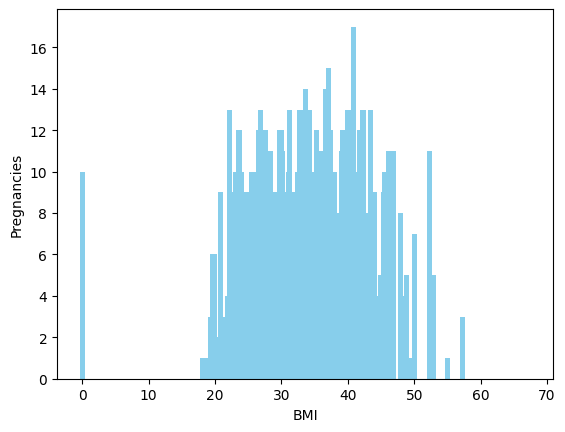

In [ ]:
plt.bar(diabetics.BMI, diabetics.Pregnancies, color='skyblue')
plt.xlabel("BMI")
plt.ylabel("Pregnancies")

Text(0, 0.5, 'Frequency')

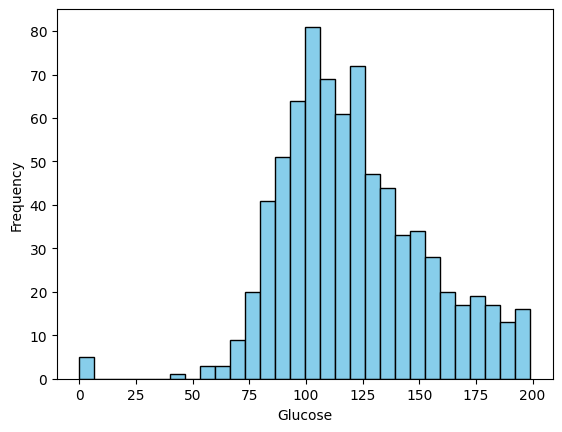

In [ ]:
plt.hist(diabetics.Glucose, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Glucose")
plt.ylabel("Frequency")

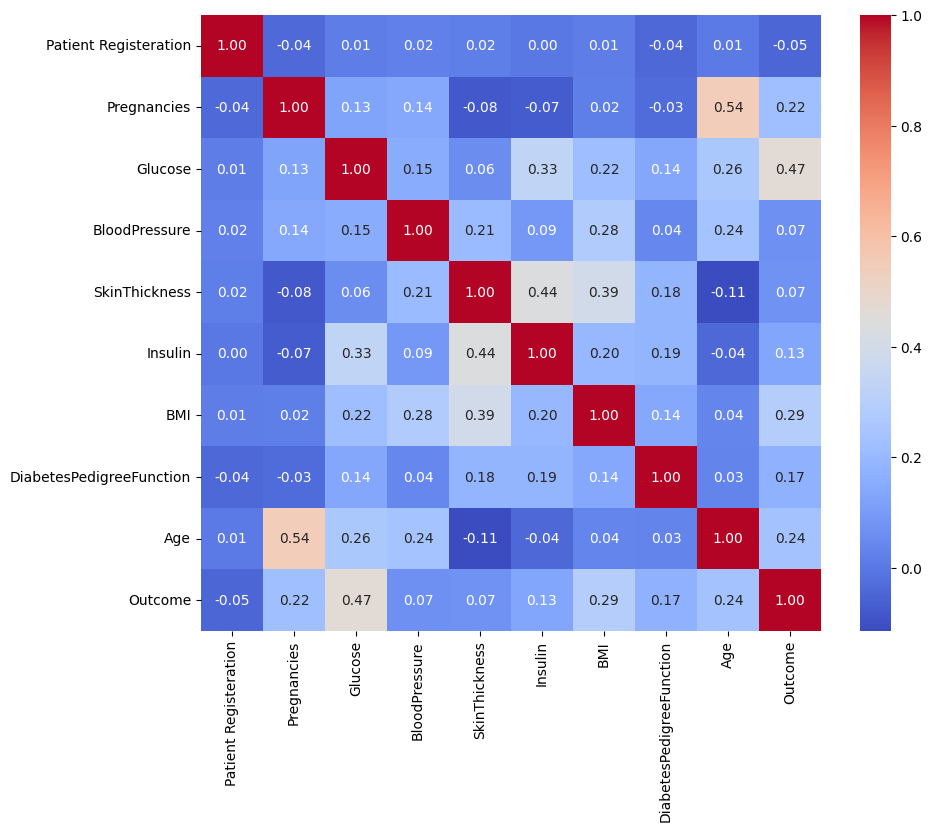

In [ ]:

corr_matrix = diabetics.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

In [ ]:
diabetics.columns

Index(['Patient Registeration', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

## **7. Cleaning the Dataset**

##**Replacing zero values with the mean of the columnn**


In [ ]:
diabetics['BMI'] = diabetics['BMI'].replace(0, diabetics['BMI'].mean())
diabetics['BloodPressure'] = diabetics['BloodPressure'].replace(0, diabetics['BloodPressure'].mean())
diabetics['Glucose'] = diabetics['Glucose'].replace(0, diabetics['Glucose'].mean())
diabetics['Insulin'] = diabetics['Insulin'].replace(0, diabetics['Insulin'].mean())
diabetics['SkinThickness'] = diabetics['SkinThickness'].replace(0, diabetics['SkinThickness'].mean())


## **Removing some outliers from all the predictors(features)**

In [ ]:

outlier = diabetics['Pregnancies'].quantile(0.98)
# removing the top 2% data from the pregnancies column
diabetics = diabetics[diabetics['Pregnancies']<outlier]

outlier = diabetics['BMI'].quantile(0.99)
# removing the top 1% data from BMI column
diabetics = diabetics[diabetics['BMI']<outlier]

outlier = diabetics['SkinThickness'].quantile(0.99)
# removing the top 1% data from SkinThickness column
diabetics = diabetics[diabetics['SkinThickness']<outlier]

outlier = diabetics['Insulin'].quantile(0.95)
# removing the top 5% data from Insulin column
diabetics = diabetics[diabetics['Insulin']<outlier]

outlier = diabetics['DiabetesPedigreeFunction'].quantile(0.99)
# removing the top 1% data from DiabetesPedigreeFunction column
diabetics = diabetics[diabetics['DiabetesPedigreeFunction']<outlier]

outlier = diabetics['Age'].quantile(0.99)
# removing the top 1% data from Age column
diabetics = diabetics[diabetics['Age']<outlier]


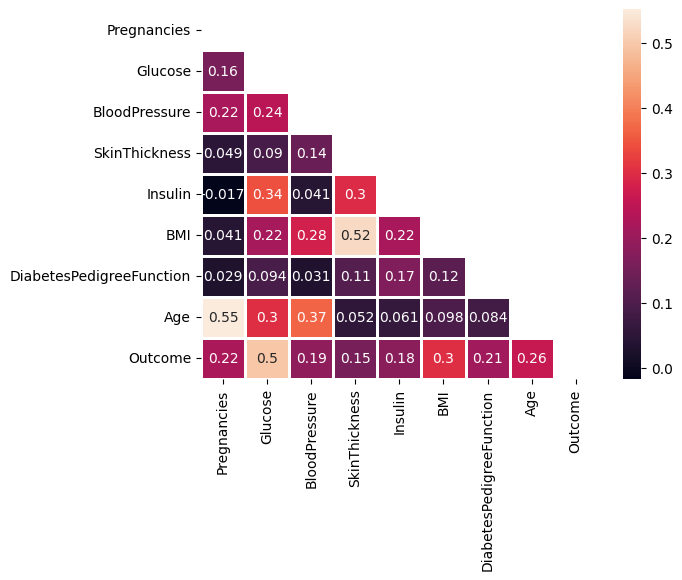

In [ ]:

corr = diabetics.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [ ]:
predictors = ['Pregnancies', 'Glucose', 'Insulin']
X = diabetics[predictors]
y = diabetics['Outcome']

In [ ]:
X = diabetics.drop(columns = ['Outcome'])
y = diabetics['Outcome']

In [ ]:
diabetics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               674 non-null    int64  
 1   Glucose                   674 non-null    float64
 2   BloodPressure             674 non-null    float64
 3   SkinThickness             674 non-null    float64
 4   Insulin                   674 non-null    float64
 5   BMI                       674 non-null    float64
 6   DiabetesPedigreeFunction  674 non-null    float64
 7   Age                       674 non-null    int64  
 8   Outcome                   674 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 52.7 KB


## **8. Splitting the data into testing and training data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## **9. Scaling the data**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##**10. Models**

##**a. KNN Classifier**

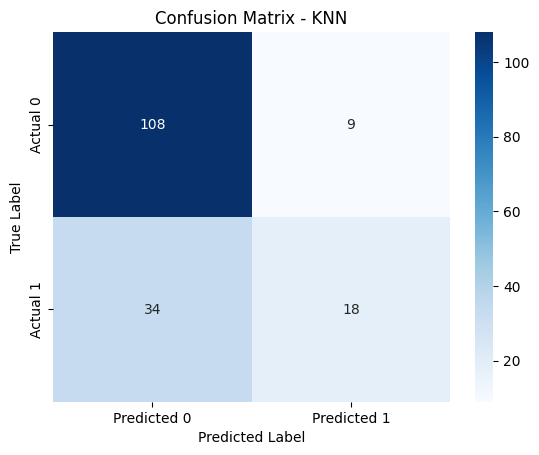

Accuracy: 0.7455621301775148
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       117
           1       0.67      0.35      0.46        52

    accuracy                           0.75       169
   macro avg       0.71      0.63      0.64       169
weighted avg       0.73      0.75      0.72       169



In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=4)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_report_knn = classification_report(y_test, y_pred)
print("Classification Report (KNN):")
print(classification_report_knn)

## **Hyperparameter tuning**

## **Grid Search**

In [ ]:
knn = KNeighborsClassifier()

# Define the hyperparameter grid for KNN
knn_grid_params = {
    'n_neighbors': range(1, 10),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Use StratifiedKFold for better handling of imbalanced classes
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV for KNN with cross-validation
knn_grid_search = GridSearchCV(knn, knn_grid_params, cv=cv, n_jobs=-1, verbose=1)
knn_grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", knn_grid_search.best_params_)
print("Best Cross-Validation Score:", knn_grid_search.best_score_)

# Use the best estimator from GridSearchCV
best_knn = knn_grid_search.best_estimator_

# Evaluate the best KNN model on the test set
y_pred_knn = best_knn.predict(X_test)

# Calculate accuracy
knn_train_acc = accuracy_score(y_train, best_knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred_knn)

print(f"Training Accuracy of Best KNN Model is {knn_train_acc}")
print(f"Test Accuracy of Best KNN Model is {knn_test_acc}")

# Confusion matrix
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):")
print(confusion_matrix_knn)

# Classification report
classification_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report (KNN):")
print(classification_report_knn)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation Score: 0.7663366336633664
Training Accuracy of Best KNN Model is 0.8178217821782178
Test Accuracy of Best KNN Model is 0.7692307692307693
Confusion Matrix (KNN):
[[103  14]
 [ 25  27]]
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       117
           1       0.66      0.52      0.58        52

    accuracy                           0.77       169
   macro avg       0.73      0.70      0.71       169
weighted avg       0.76      0.77      0.76       169



# **Analysis**

The provided code implements a two-step process for building and refining a k-nearest neighbors (KNN) classification model. In the initial phase, a KNN model with 4 neighbors is trained on the given training data (X_train, y_train). Predictions are then made on the test data (X_test), and the resulting confusion matrix is displayed as a heatmap using seaborn. The model's accuracy is calculated, and a detailed classification report is printed, offering insights into its performance.

The second phase involves hyperparameter tuning to optimize the KNN model's configuration. A new KNN model is created without specifying hyperparameters, and a grid of hyperparameter values is defined, including the number of neighbors, weights, and distance metric. GridSearchCV is employed for hyperparameter tuning, utilizing 5-fold stratified cross-validation to enhance robustness. The best hyperparameters and the corresponding cross-validation score are printed.


The best KNN model, determined through the grid search, is then evaluated on the test set. Training and test accuracies are computed, and additional metrics such as the confusion matrix and classification report are provided to offer a comprehensive assessment of the tuned model's performance. This two-step approach allows for a systematic exploration of KNN model variations, leading to improved predictive capabilities on the given dataset.

## **b. Logistic Regression**

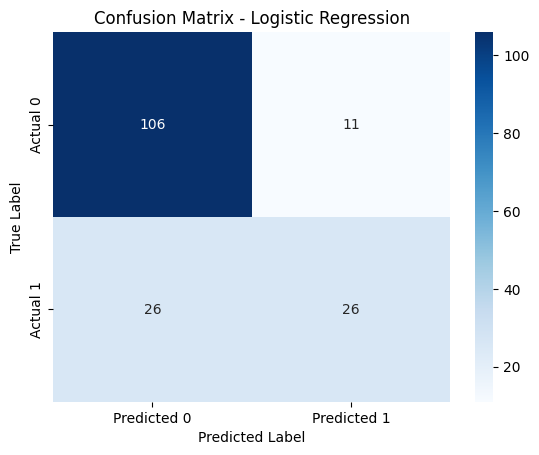

Classification Report (LogR):
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       117
           1       0.70      0.50      0.58        52

    accuracy                           0.78       169
   macro avg       0.75      0.70      0.72       169
weighted avg       0.77      0.78      0.77       169

Accuracy: 0.7810650887573964


In [ ]:
# Instantiate the Logistic Regression Classifier
logreg_model = LogisticRegression(penalty='l2',random_state=42)

#Ridge,{'alpha': 0.01}
# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_log= classification_report(y_test, y_pred)
print("Classification Report (LogR):")
print(classification_report_log)
print(f"Accuracy: {accuracy}")

## **Hyperparameter Tuning**

## **Grid Search**

In [ ]:
# Instantiate the Logistic Regression model
logistic_regression = LogisticRegression()

# Define the hyperparameter grid for Logistic Regression
logreg_grid_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.02, 0.3, 4, 50, 100],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV for Logistic Regression
logreg_grid_search = GridSearchCV(logistic_regression, logreg_grid_params, cv=5, n_jobs=-1, verbose=1)
logreg_grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(logreg_grid_search.best_params_)
print(logreg_grid_search.best_score_)

# Use the best estimator from GridSearchCV
best_logreg = logreg_grid_search.best_estimator_

# Make predictions on the test set
y_pred_logreg = best_logreg.predict(X_test)

# Calculate accuracy
logreg_train_acc = accuracy_score(y_train, best_logreg.predict(X_train))
logreg_test_acc = accuracy_score(y_test, y_pred_logreg)

print(f"Training Accuracy of Logistic Regression Model is {logreg_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {logreg_test_acc}")

# Confusion matrix
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix_logreg)

# Classification report
classification_report_logreg = classification_report(y_test, y_pred_logreg)
print("Classification Report (Logistic Regression):")
print(classification_report_logreg)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 4, 'penalty': 'l1', 'solver': 'liblinear'}
0.7861386138613862
Training Accuracy of Logistic Regression Model is 0.7920792079207921
Test Accuracy of Logistic Regression Model is 0.7810650887573964
Confusion Matrix (Logistic Regression):
[[106  11]
 [ 26  26]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       117
           1       0.70      0.50      0.58        52

    accuracy                           0.78       169
   macro avg       0.75      0.70      0.72       169
weighted avg       0.77      0.78      0.77       169



# **Analysis**

The provided code entails a comprehensive process for constructing, tuning, and assessing a Logistic Regression model. Here's an overview:

The Logistic Regression model is initially instantiated without specifying hyperparameters. A hyperparameter grid is then defined, incorporating options for penalty type (l1 or l2), regularization strength (C), and solver algorithm (liblinear or saga). GridSearchCV is utilized for hyperparameter tuning, employing 5-fold cross-validation to explore different configurations effectively. The best hyperparameters and the corresponding cross-validation score are printed.

The best Logistic Regression model, as determined by the grid search, is then evaluated on the test set. Predictions are generated, and training and test accuracies are calculated. Additionally, a confusion matrix is computed to visualize the model's performance in terms of true positives, true negatives, false positives, and false negatives. A detailed classification report is printed, offering precision, recall, and F1-score metrics for both classes (0 and 1). These results collectively provide a comprehensive understanding of the Logistic Regression model's performance and its ability to generalize to new, unseen data.

## **c. Random Forest Classifier**

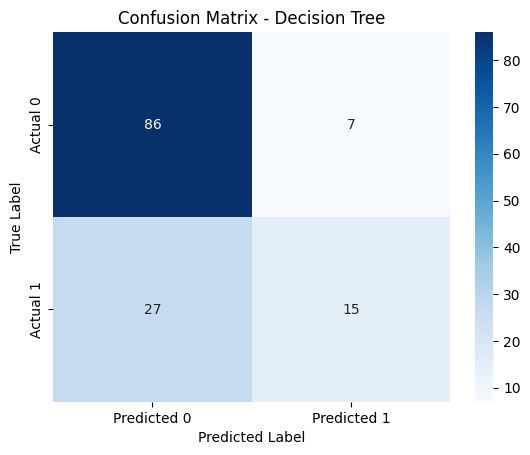

Testing Accuracy: 0.7481481481481481
Training Accuracy: 0.7755102040816326
Feature Importance:
Pregnancies: 0.08974666136482341
Glucose: 0.3431366348782142
BloodPressure: 0.04740908585661307
SkinThickness: 0.02093193709843176
Insulin: 0.06593155881899145
BMI: 0.189233470041282
DiabetesPedigreeFunction: 0.06637464860242884
Age: 0.17723600333921527
Cross-Validation Results: [0.71851852 0.73333333 0.77037037 0.74814815 0.7761194 ]
Mean Accuracy: 0.749297954671089


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=60,max_depth=2, criterion = 'gini', random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, rf_model.predict(X_train)) #rf_model: This is an instance of the Random Forest Classifier that you have previously instantiated and trained on your training data.
print(f"Testing Accuracy: {accuracy}")

print(f"Training Accuracy: {accuracy_train}")


# Get feature importances
feature_importance = rf_model.feature_importances_

# Create a dictionary to associate feature names with their importances
feature_importance_dict = dict(zip(X.columns, feature_importance))

# Print or visualize feature importances
print("Feature Importance:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

#probability
y_probabilities = rf_model.predict_proba(X_test)


# Define the number of folds (e.g., 5-fold cross-validation)
num_folds = 5

# Create a stratified k-fold object to ensure class distribution is maintained in each fold
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the number of folds (e.g., 5-fold cross-validation)
num_folds = 5

# Perform cross-validation
cross_val_results = cross_val_score(rf_model, X, y, cv=stratified_kfold, scoring='accuracy')


# Print the cross-validation results
print(f"Cross-Validation Results: {cross_val_results}")
print(f"Mean Accuracy: {cross_val_results.mean()}")


From the above observation, model performs reasonably well on both training and testing datasets, with accuracies around 75-78%. The feature importance suggests that 'Glucose' is a significant predictor in your model. Cross-validation results provide additional confidence in the model's generalization.

## **Hyperparameter Tuning**

## **Grid Search**

In [ ]:
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid for Random Forest
rf_grid_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_classifier, rf_grid_params, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(rf_grid_search.best_params_)
print(rf_grid_search.best_score_)

# Use the best estimator from GridSearchCV
best_rf_classifier = rf_grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_classifier.predict(X_test)

# Calculate accuracy
rf_train_acc = accuracy_score(y_train, best_rf_classifier.predict(X_train))
rf_test_acc = accuracy_score(y_test, y_pred_rf)

print(f"Training Accuracy of Random Forest Model is {rf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rf_test_acc}")

# Confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(confusion_matrix_rf)

# Classification report
classification_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest):")
print(classification_report_rf)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 100}
0.8033402561439946
Training Accuracy of Random Forest Model is 0.8998144712430427
Test Accuracy of Random Forest Model is 0.7333333333333333
Confusion Matrix (Random Forest):
[[75 18]
 [18 24]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        93
           1       0.57      0.57      0.57        42

    accuracy                           0.73       135
   macro avg       0.69      0.69      0.69       135
weighted avg       0.73      0.73      0.73       135



# **Analysis**

The given code orchestrates a thorough process involving the construction, assessment, and refinement of a Random Forest Classifier. Firstly, the dataset undergoes an 80-20 split into training and testing sets. A Random Forest model is then instantiated and trained on the training data with specified hyperparameters, including 60 estimators, a maximum depth of 2, and the 'gini' criterion. Predictions on the test data are made, and the model's performance is visualized through a confusion matrix displayed as a heatmap.

The code further computes and presents both testing and training accuracies. Additionally, the feature importances of the trained Random Forest model are obtained, creating a dictionary associating feature names with their respective importances Furthermore, the code explores the model's predictive probabilities and employs a 5-fold stratified cross-validation approach to assess its generalization capabilities. The cross-validation results, including the mean accuracy, are printed. In the subsequent phase, hyperparameter tuning is conducted using GridSearchCV. A new Random Forest model is instantiated, and an extensive hyperparameter grid is defined. The grid search identifies the best hyperparameters along with the corresponding cross-validation score, providing insights into optimal model configuration.

Lastly, the best-performing Random Forest model is evaluated on the test set, and key metrics such as training and test accuracies, the confusion matrix, and the classification report are printed. This comprehensive approach offers a detailed analysis of the Random Forest Classifier's performance, shedding light on its predictive power, feature importance, and the impact of hyperparameter tuning on its overall effectiveness in handling the given dataset.

## **d. Decision Tree Classifier**

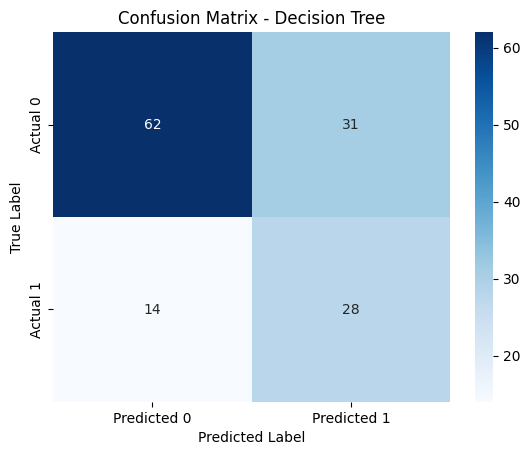

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.67      0.73        93
           1       0.47      0.67      0.55        42

    accuracy                           0.67       135
   macro avg       0.65      0.67      0.64       135
weighted avg       0.71      0.67      0.68       135

Accuracy: 0.6666666666666666


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report (Random Forest):")
print(classification_report_rf)
print(f"Accuracy: {accuracy}")


# **Hyperparameter Tuning**

# **Grid Search**

In [ ]:
dtc = DecisionTreeClassifier()
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)


dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

# confusion matrix

confusion_matrix(y_test, y_pred)

# classification report

print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 512 candidates, totalling 2560 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 9}
0.7607130494980963
Training Accuracy of Decision Tree Model is 0.8812615955473099
Test Accuracy of Decision Tree Model is 0.6962962962962963
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        93
           1       0.51      0.55      0.53        42

    accuracy                           0.70       135
   macro avg       0.65      0.66      0.65       135
weighted avg       0.70      0.70      0.70       135



# **Analysis**

The provided code involves the construction, evaluation, and hyperparameter tuning of a Decision Tree Classifier. Initially, the dataset is split into training and testing sets, and a Decision Tree model is instantiated and trained on the training data. Predictions are made on the test data, and a confusion matrix is generated and visually represented as a heatmap. The model's accuracy and a classification report are then printed to assess its performance.

Subsequently, hyperparameter tuning is performed using GridSearchCV. The Decision Tree Classifier is redefined, and a grid of hyperparameter values is specified, including criteria for splitting, maximum depth, minimum samples for splitting, and minimum samples per leaf. The grid search identifies the best hyperparameters, and their values, along with the corresponding cross-validation score, are printed.

The final tuned Decision Tree model is then evaluated on the test set. Training and test accuracies are calculated, and a confusion matrix is generated. Additionally, a classification report is printed, providing a detailed summary of precision, recall, and F1-score metrics for both classes (0 and 1). Overall, the code offers insights into the Decision Tree Classifier's performance and the impact of hyperparameter tuning on its predictive capabilities.


## **Limitations**


**Model Overfitting:** When a machine learning model learns the training data too well, it captures noise and becomes less able to generalize to new data. This is known as overfitting, and it is a risk in predictive modeling. Resolving overfitting in the model is essential to guaranteeing accurate forecasts outside of the training set.

**Biases in Training Data:** Biases in training data have the potential to provide skewed model results, which in turn might prolong discrepancies. To guarantee that the machine learning model produces impartial and equitable predictions for a range of populations, biases must be found and corrected.

**External Factors and Unseen Confounding Factors:** External and unseen confounding factors can alter the accuracy of forecasts. For solid and trustworthy findings, these issues must be acknowledged and taken into consideration during the model-building process, particularly when working with complicated health-related data.

**Unanticipated Health System Changes:** The dynamic of health systems creates issues in model adaption. Predictive models remain relevant and successful despite changing medical environments because they anticipate and adapt to unanticipated changes in healthcare systems.

**Unseen Disease Subtypes:** Since models might not be trained to identify them, the occurrence of unseen disease subtypes presents a difficulty for predictive modeling. For complete and reliable predictions in healthcare situations, models must be continuously adjusted and refined to integrate new knowledge about developing disease subtypes.







## **Conclusion**


In conclusion, our project underscores the importance of implementing machine learning techniques as a screening tool in healthcare settings for the early detection of diabetes. Through our analysis, we employed a variety of models, including decision trees, KNN, logistic regression, and random forest. These models have the potential to effectively sort patients into high-risk and low-risk categories, allowing for timely interventions and personalized care regimens. To ensure the successful adoption of these predictive tools, active collaboration with healthcare professionals and policymakers is crucial. Furthermore, it is imperative to engage in continuous monitoring and regular updates of the models based on new and emerging data, which is vital for sustaining their relevance and accuracy in the ever-evolving landscape of diabetes management. Notably, logistic regression emerged as the top-performing model in our tests, achieving an accuracy of 76.29% after hyperparameter tuning, pointing to its utility in this context.



## **References**



*   Davenport, Liam. "Both Too Much and Not Enough Sleep Raises T2D Risk." Medscape Medical News, August 28, 2023. https://www.medscape.com/viewarticle/both-too-much-and-not-enough-sleep-raises-t2d-risk-2023a1000jxj?form=fpf.


* Gujarati, Krushika. "Unveiling Diabetes Prediction: A Deep Dive into Data Mining Techniques." Medium, November 1, 2023. https://medium.com/@krushika.gujarati/unveiling-diabetes-prediction-a-deep-dive-into-data-mining-techniques-fb66265b0e8d.


* "Grid Search." scikit-learn 1.3.2 documentation. Accessed [Jan 10, 2024]. https://scikit-learn.org/stable/modules/grid_search.html.


*   Chakure, Afroz. "Random Forest Classifier in Python: A Guide." Updated by Brennan Whitfield, April 19, 2023. Built In. https://builtin.com/data-science/random-forest-python-deep-dive.


*   National Institute of Diabetes and Digestive and Kidney Diseases. "Diabetes Healthcare: Comprehensive Dataset-AI." Kaggle. Accessed [Jan 9, 2024]. https://www.kaggle.com/datasets/deependraverma13/diabetes-healthcare-comprehensive-dataset.


*   Pant, Ayush. "Introduction to Logistic Regression." Towards Data Science, January 22, 2019. https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148.


*   Sachinsoni. "K Nearest Neighbours — Introduction to Machine Learning Algorithms." Medium, June 11, 2023. https://medium.com/@sachinsoni600517/k-nearest-neighbours-introduction-to-machine-learning-algorithms-9dbc9d9fb3b2.



*   Brownlee, Jason. "Train-Test Split for Evaluating Machine Learning Algorithms." Machine Learning Mastery, August 26, 2020. https:/machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/.


*   "The Importance of Decision Trees in Machine Learning." Turing.com. Accessed [Jan 9, 2024]. https://www.turing.com/kb/importance-of-decision-trees-in-machine-learning.













